In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests
import time

In [4]:
model = ResNet50(weights="imagenet", include_top=True)

102973440/102967424 [==============================] - 3s 0us/step


In [5]:
def prepare_image(image, target):
	# giriş görüntüsünü yeniden boyutlandırma ve ön işlemerin yapılması
	image = image.resize(target)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
	image = imagenet_utils.preprocess_input(image)

	# işlenmiş görüntüyü alma
	return image

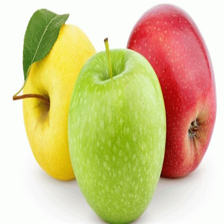

In [11]:
image_path = '/gdrive/My Drive/NesneTanima/5.jpg'
image = Image.open(image_path) 
image = image.resize((224, 224))
image

In [12]:
data = {"success": False}

pre_image = prepare_image(image, target=(224, 224)) # 224 x 224 boyutlu hale getir
timeStart = int(round(time.time() * 1000))
preds = model.predict(pre_image)  # Kesirim modeline ön işlemden geçmiş görüntüyü uygula
timeStop = int(round(time.time() * 1000))
results = imagenet_utils.decode_predictions(preds) #kestirim
data["predictions"] = []


for (imagenetID, label, prob) in results[0]: # ImageNet veri kümseinden etiket, olasılık ve kestrim sonucunu al
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)
  
data["success"] = True

print(data)

{'success': True, 'predictions': [{'label': 'Granny_Smith', 'probability': 0.8566741347312927}, {'label': 'lemon', 'probability': 0.048272162675857544}, {'label': 'banana', 'probability': 0.040693607181310654}, {'label': 'strawberry', 'probability': 0.006670642644166946}, {'label': 'fig', 'probability': 0.006306227296590805}]}


In [13]:
print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1}'dır.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"]))
print("Time: ", str(timeStop- timeStart) + " ms")

Sınıflandırma tahmini en yüksek olan 0.8566741347312927 oranıyla Granny_Smith'dır.
Time:  217 ms
